# Smart Grid

* 전기 및 ICT를 활용하여 전력망을 지능화·고도화함으로써 고품질의 전력서비스를 제공하고 에너지 이용효율을 극대화하는 전력망
    * 현재의 전력시스템은 최대 수요량에 맞춰 예비율을 두고 일반적으로 예상수요보다 15%정도 많이 생산하도록 설계 
    * 전기를 생산하기 위해 연료를 확보해야 하고 각종 발전설비가 추가적으로 필요하며, 버리는 전기량이 많아 에너지 효율 떨어짐
    * 또한 석탄, 석유 가스 등을 태우는 과정에서 이산화탄소 배출 증가

* 에너지 효율 향상에 의해 에너지 낭비 절감 및 신·재생에너지에 바탕을 둔 분산전원의 활성화를 통해 에너지 해외 의존도 감소 및 기존의 발전설비에 들어가는 화석연료 사용 절감
    * 온실가스 감소효과로 지구 온난화 방지

> https://home.kepco.co.kr/kepco/KO/C/htmlView/KOCDHP00201.do?menuCd=FN05030502

* 전기의 생산, 운반, 소비 과정에 ICT를 접목하여 공급자와 소비자가 서로 상호작용함으로써 효율성을 높인 지능형 전력망시스템

> https://ko.wikipedia.org/wiki/%EC%8A%A4%EB%A7%88%ED%8A%B8_%EA%B7%B8%EB%A6%AC%EB%93%9C

## 요소

* Reliability
* Flexibility in network topology
* Efficiency
* Sustainability
* Market-enabling

<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Staying_big_or_getting_smaller.jpg" width="700">

<div style="text-align:center"> 전통적인 시스템 vs 스마트 그리드 시스템 </div>

> https://en.wikipedia.org/wiki/Smart_grid

## 개요

* 탈중앙 스마트 그리드 제어 개념을 구현한 4-node star 시스템의 local sability 분석
    * 생산자는 중앙에 위치

## 1. 데이터 불러오기

```
from google.colab import drive
drive.mount('/content/drive')
```

```
path = '/content/drive/MyDrive/Colab Notebooks/링크 강의자료/SmartGrid/Data_for_UCI_named.csv'
data = pd.read_csv(path)
```

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Data_for_UCI_named.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


### 1.1 Attribute information

We have 11 predictive attributes (tau1,tau2,tau3,tau4,p2,p3,p4,g1,g2,g3,g4), 1 non-predictive (p1), 2 goals (stab, stabf).

* tau[x]: reaction time of participant (real from the range [0.5,10]s). 
    * 참가자들의 반응시간
        * Tau1 - the value for electricity producer.
        * Tau2~4 - the value for electricity consumer.

* p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2
    * 소비한 전기/생산한 전기
        * p1 = abs(p2 + p3 + p4)
            * p1 - the value for electricity producer.
        * p2~4 - the value for electricity consumer.

* g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). 
    * 가격 탄력성에 비례하는 계수
        * g1 - the value for electricity producer.
        * g2~4 - the value for electricity consumer.

*  stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable else is linearly stable)(real)

* stabf: the stability label of the system (categorical: stable/unstable)
    * 양수면 불안정, 음수면 안정

## 2. 데이터 탐색

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

### 비율 확인

In [7]:
stabf_count = data.stabf.value_counts()
stabf_count

unstable    6380
stable      3620
Name: stabf, dtype: int64

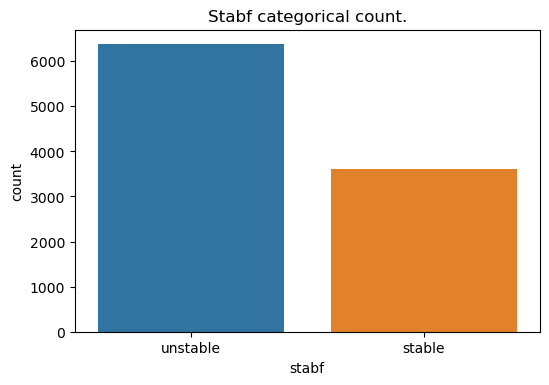

In [8]:
plt.figure(dpi=100) # 화질 설정
sns.countplot(x=data.stabf)
plt.title('Stabf categorical count.')
plt.show()

In [9]:
print(f'stabf target have {round(100*(stabf_count[0]/stabf_count.sum()))}% \
for unstable and {round(100*(stabf_count[1]/stabf_count.sum()))}% for stable.')

stabf target have 64% for unstable and 36% for stable.


* unstable : stable 비율 64:36

### 상태 확인

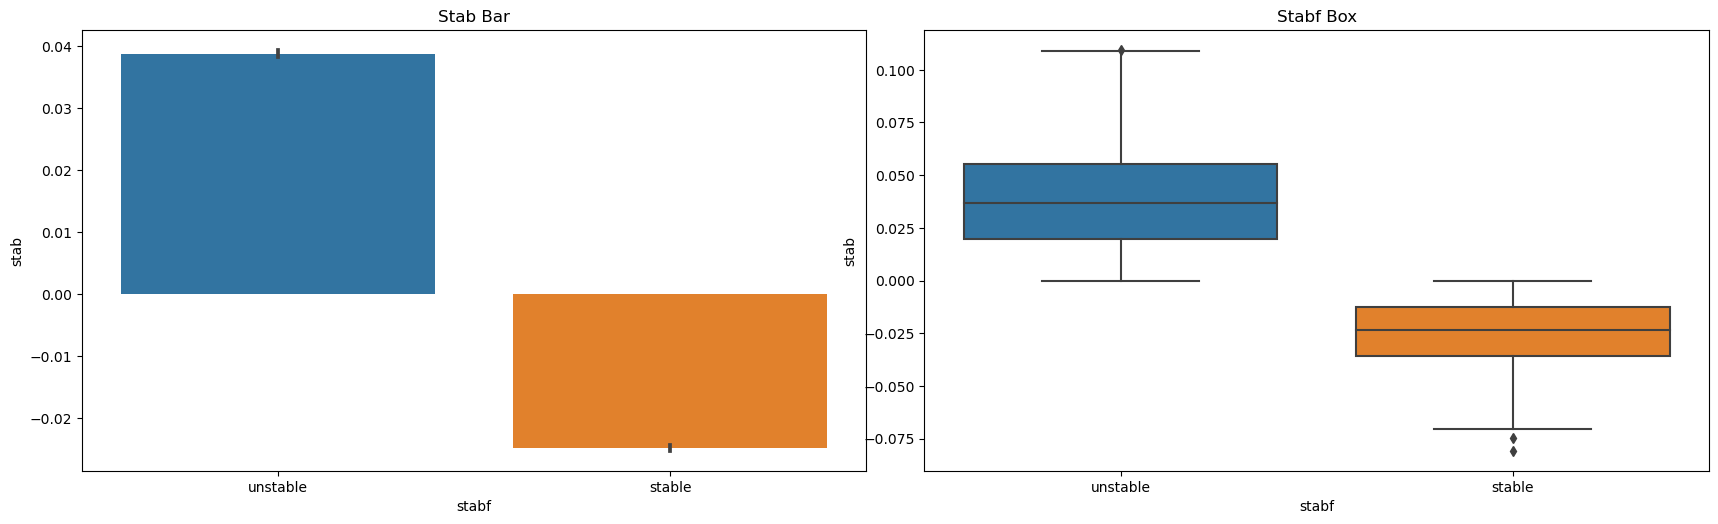

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

sns.barplot(x='stabf', y='stab', data=data, ax=axes[0])
sns.boxplot(x='stabf', y='stab', data=data, ax=axes[1])
axes[0].set_title('Stab Bar')
axes[1].set_title('Stabf Box')
plt.show()

* stab이 음수면 stable, stab이 양수면 unstable한상태
* 분류가 잘못된 것은 없음을 확인

In [11]:
def scatterplot_multi(data): 
    cols = []
    for i in data.columns[:-2]:
        if data[i].dtypes == "float64" or data[i].dtypes == 'int64':
            cols.append(i)  # column 명 추출
    
    gp = plt.figure(figsize=(20,20))  # figure 생성
    gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(3, 4, i)
        sns.scatterplot(data=data, x=cols[i-1], y='stab')
        ax.set_title(f'Scatter plot for {cols[i-1]}')

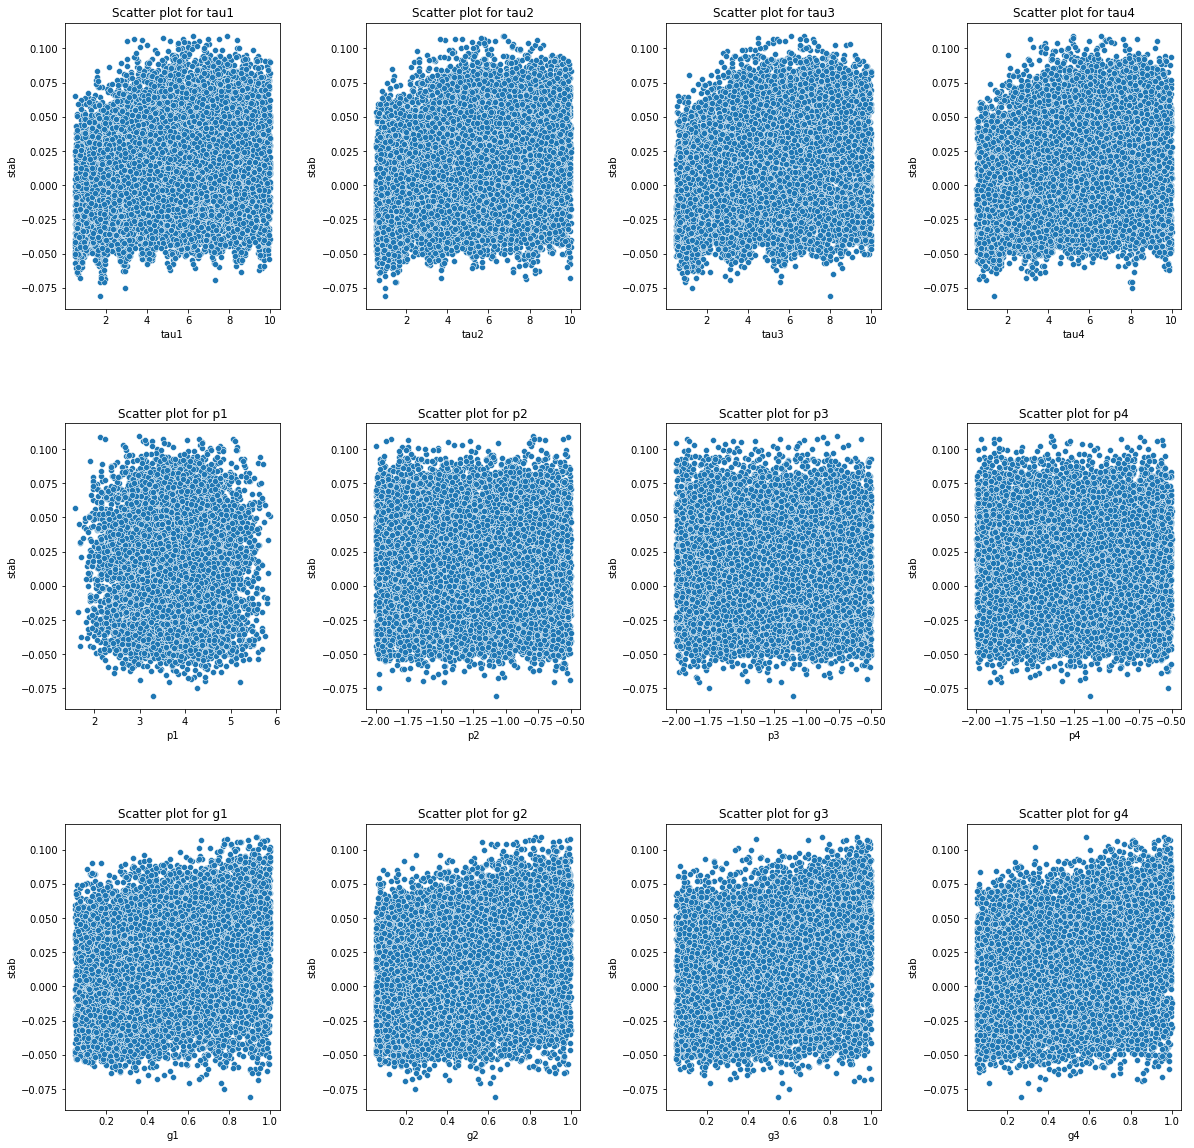

In [12]:
scatterplot_multi(data)

### 회귀

* 수업에서는 다루지 않을 예정

In [13]:
from scipy.stats import normaltest, norm

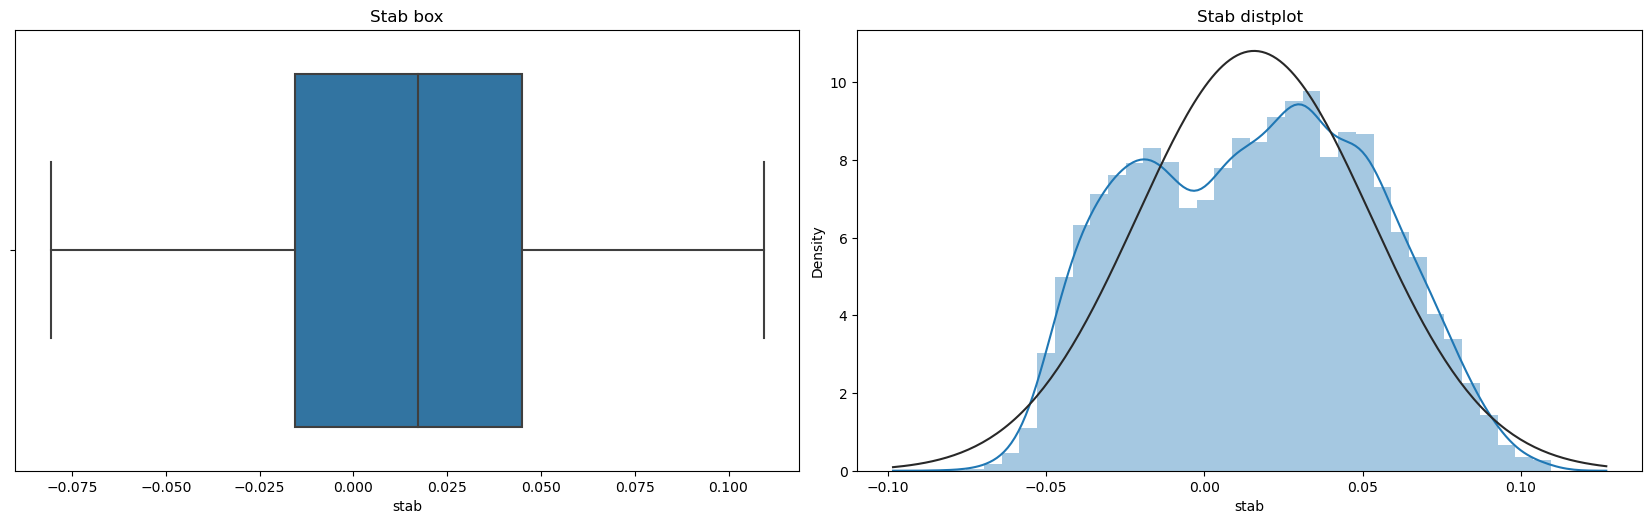

In [14]:
fig, axis = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

sns.boxplot(data=data, x='stab', ax = axis[0])
sns.distplot(data['stab'], fit=norm,  ax = axis[1])

axis[0].set_title('Stab box')
axis[1].set_title('Stab distplot')
plt.show()

In [15]:
normaltest(data.stab)

NormaltestResult(statistic=1451.9183245054687, pvalue=0.0)

### 이진 분류

* 학습시킬 속성 추출
    * 즉 타겟 제외

In [16]:
cols = list(data.columns)
cols.remove('stab')
cols.remove('stabf')
cols

['tau1',
 'tau2',
 'tau3',
 'tau4',
 'p1',
 'p2',
 'p3',
 'p4',
 'g1',
 'g2',
 'g3',
 'g4']

In [17]:
def boxplot_multi(data): 
    cols = []
    for i in data.columns:
        if data[i].dtypes == "float64" or data[i].dtypes == 'int64':
            cols.append(i)  # column 명 추출
    
    gp = plt.figure(figsize=(20,20))  # figure 생성
    gp.subplots_adjust(wspace=0.4, hspace=0.4)  # figure 설정
    
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(3, 4, i)
        sns.boxplot(x = cols[i-1], data=data)
        ax.set_title(f'Boxplot for {cols[i-1]}')

### 이상치 확인

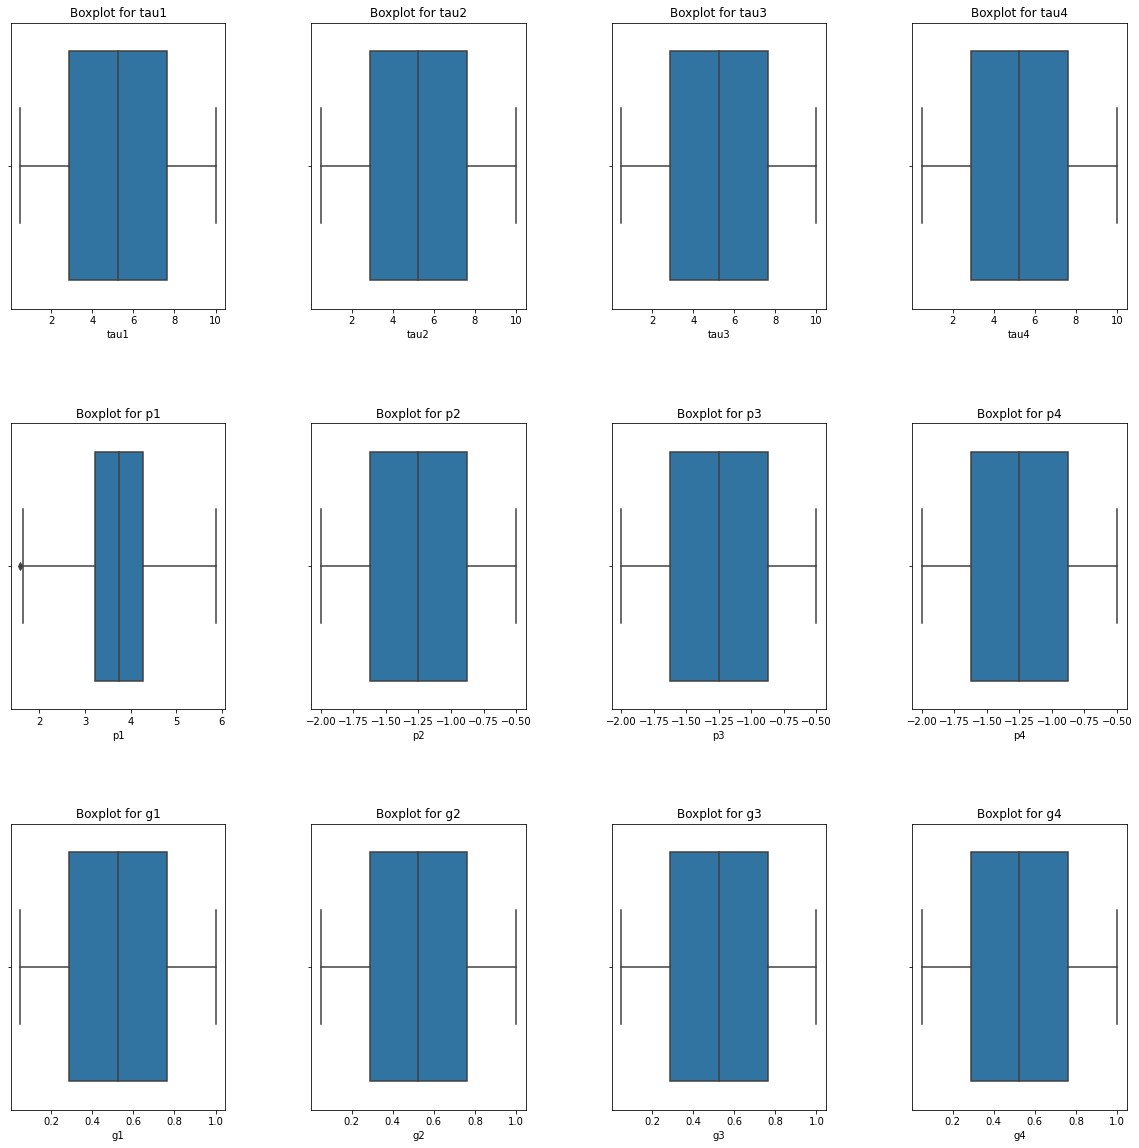

In [18]:
boxplot_multi(data[cols])

### 상관관계 확인

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F992BFF335A21035801">

> https://bskyvision.com/entry/%EB%91%90-%EB%B3%80%EC%88%98-%EA%B0%84%EC%9D%98-%EC%83%81%EA%B4%80%EC%84%B1%EC%9D%84-%ED%8C%90%EB%8B%A8%ED%95%98%EA%B8%B0-%EC%9C%84%ED%95%B4-%EC%82%AC%EC%9A%A9%EB%90%98%EB%8A%94-Pearson-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98-Spearman-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98-Kendall-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Spearman_fig2.svg/450px-Spearman_fig2.svg.png">

상관 관계가 적을 땐 큰 상관 없음

> https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%94%BC%EC%96%B4%EB%A8%BC_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98

* 비모수적인 방법 사용

In [19]:
data.corr(method='spearman')

tau1      tau2      tau3      tau4        p1        p2        p3  \
tau1  1.000000  0.015585 -0.005970 -0.017265  0.025018 -0.015485 -0.015923   
tau2  0.015585  1.000000  0.014273 -0.001966 -0.004380  0.006575  0.007675   
tau3 -0.005970  0.014273  1.000000  0.004356  0.019388 -0.003133 -0.008780   
tau4 -0.017265 -0.001966  0.004356  1.000000 -0.004149  0.010553  0.006167   
p1    0.025018 -0.004380  0.019388 -0.004149  1.000000 -0.564022 -0.575896   
p2   -0.015485  0.006575 -0.003133  0.010553 -0.564022  1.000000  0.002386   
p3   -0.015923  0.007675 -0.008780  0.006167 -0.575896  0.002386  1.000000   
p4   -0.015807 -0.005963 -0.017531 -0.011211 -0.571652 -0.006844  0.012952   
g1    0.010522 -0.001743 -0.011601 -0.004151  0.003068  0.015601 -0.003218   
g2    0.015349  0.015385  0.007670  0.008432  0.014083 -0.018033 -0.011577   
g3   -0.001278  0.016507  0.014702  0.003258  0.001552  0.007554 -0.005897   
g4    0.005495 -0.011764 -0.011498 -0.000490 -0.016524  0.019819 -0.010486   
stab  0.275756  0.291751  0.281055  0.278227  0.010363  0.005831 -0.002333   

            p4        g1        g2        g3        g4      stab  
tau1 -0.015807  0.010522  0.015349 -0.001278  0.005495  0.275756  
tau2 -0.005963 -0.001743  0.015385  0.016507 -0.011764  0.291751  
tau3 -0.017531 -0.011601  0.007670  0.014702 -0.011498  0.281055  
tau4 -0.011211 -0.004151  0.008432  0.003258 -0.000490  0.278227  
p1   -0.571652  0.003068  0.014083  0.001552 -0.016524  0.010363  
p2   -0.006844  0.015601 -0.018033  0.007554  0.019819  0.005831  
p3    0.012952 -0.003218 -0.011577 -0.005897 -0.010486 -0.002333  
p4    1.000000 -0.013635  0.002849 -0.003515  0.017506 -0.020916  
g1   -0.013635  1.000000  0.007557 -0.005835  0.012431  0.279158  
g2    0.002849  0.007557  1.000000 -0.012811 -0.014910  0.289255  
g3   -0.003515 -0.005835 -0.012811  1.000000  0.006901  0.305121  
g4    0.017506  0.012431 -0.014910  0.006901  1.000000  0.274806  
stab -0.020916  0.279158  0.289255  0.305121  0.274806  1.000000

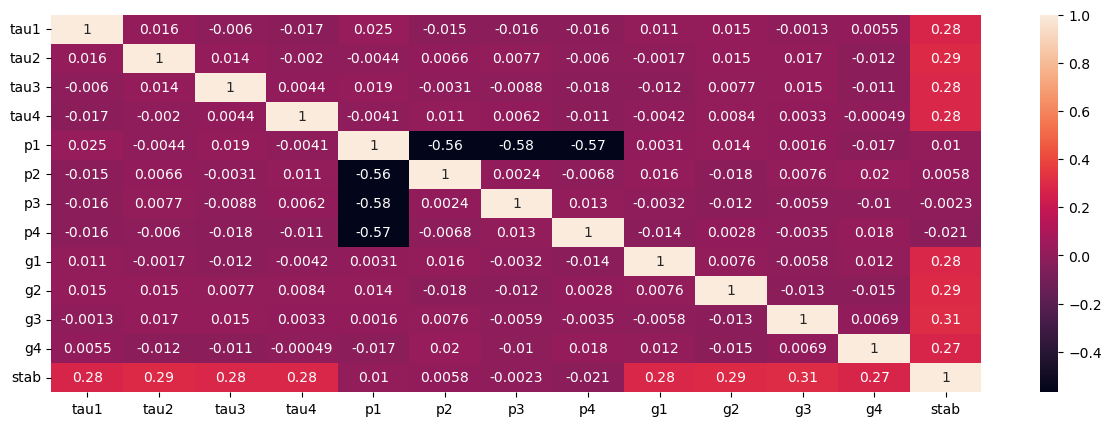

In [20]:
plt.figure(dpi=100, figsize=(15,5))
sns.heatmap(data.corr(method='spearman'), robust=True, annot=True)
plt.show()

In [21]:
def correlation_plot(data, vrs= 'stab', vsr='stabf'):
    cols = data.columns
                
    feat = list(set(cols) - set([vrs, vsr]))
    
    fig = plt.figure(figsize=(20, 20))
    fig.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    for i in range(1,len(feat)+1):
        
        ax = fig.add_subplot(2, 2, i)     
        sns.scatterplot(data=data, x=data[feat[i-1]], y=data[vrs], hue=vsr, ax=ax)   
        ax.set_xlabel(feat[i-1])
        ax.set_ylabel(vrs)
        ax.set_title('Plotting data {0} vs {1}'.format(vrs, feat[i-1]))
        ax.legend(loc='best')

* tau에 대해

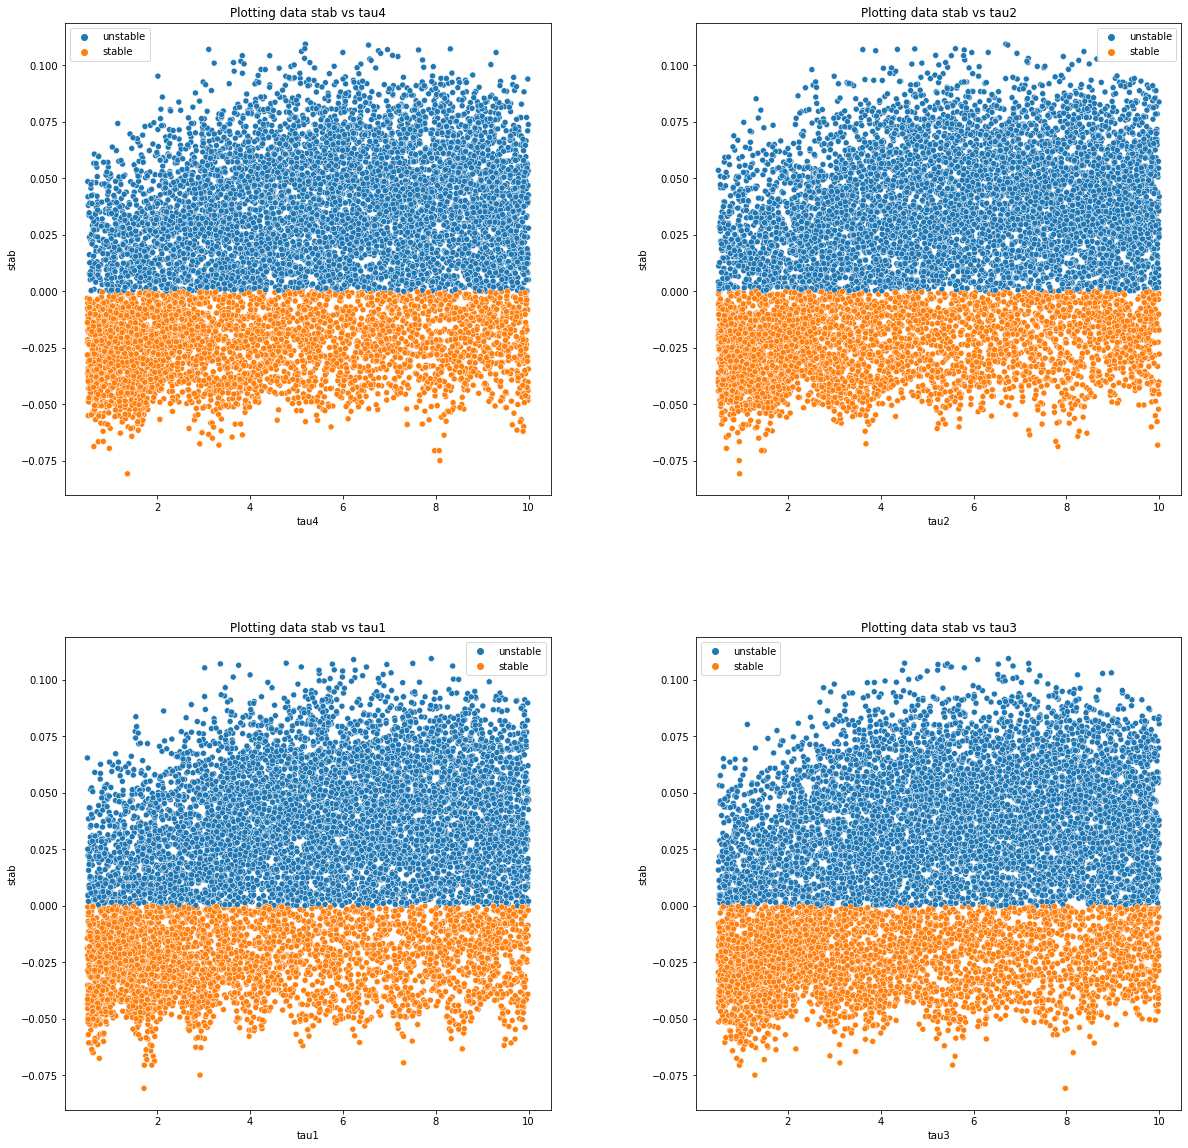

In [22]:
correlation_plot(data[['tau1', 'tau2', 'tau3', 'tau4', 'stab', 'stabf']])

* gamma에 대해

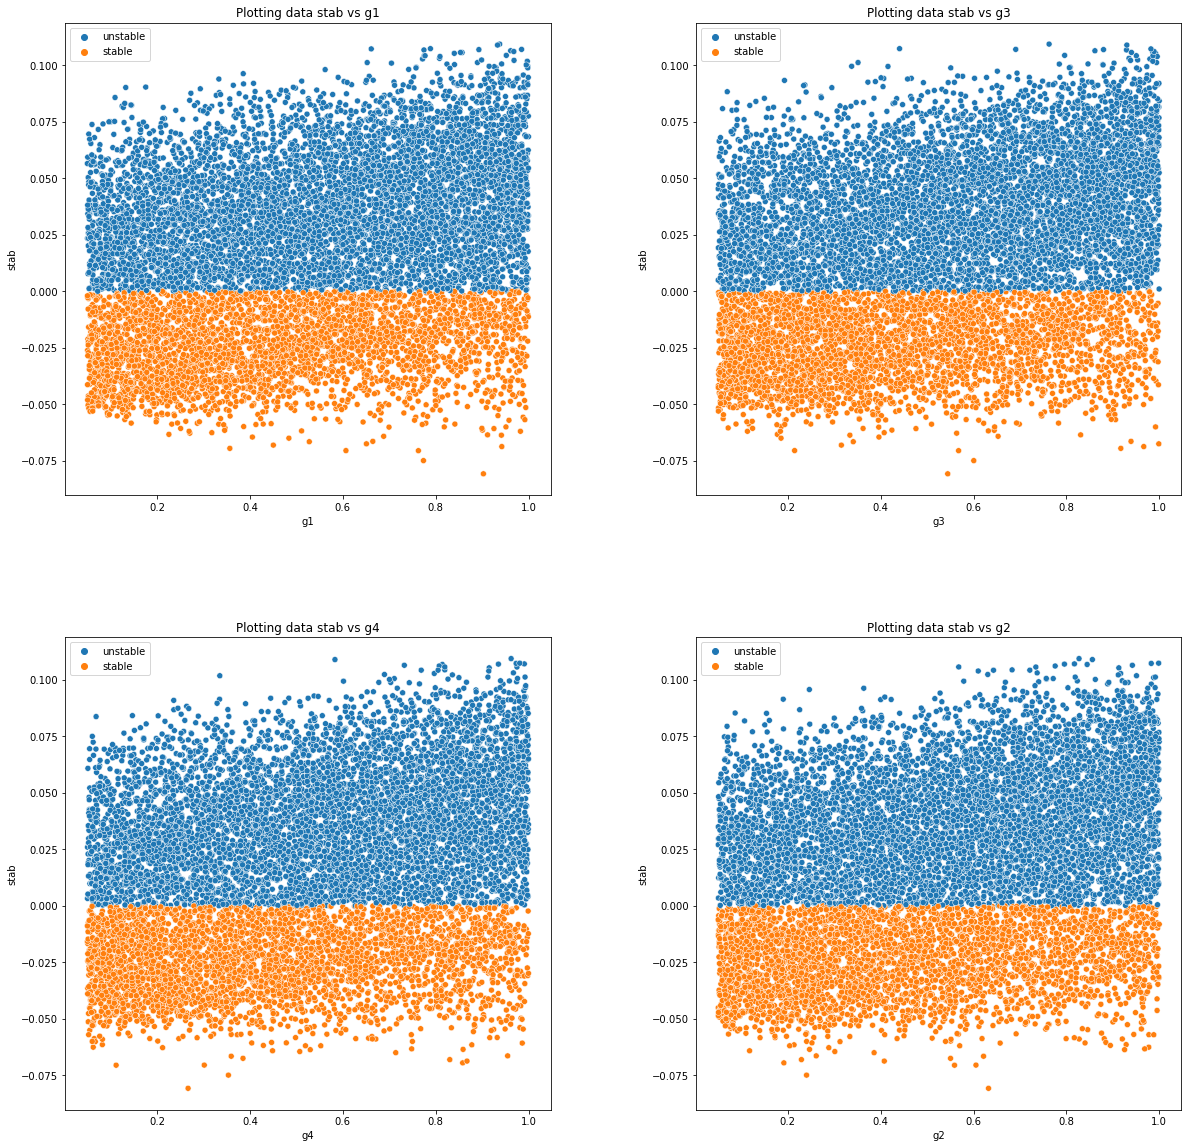

In [23]:
correlation_plot(data[['g1', 'g2', 'g3', 'g4', 'stab', 'stabf']])

* p에 대해

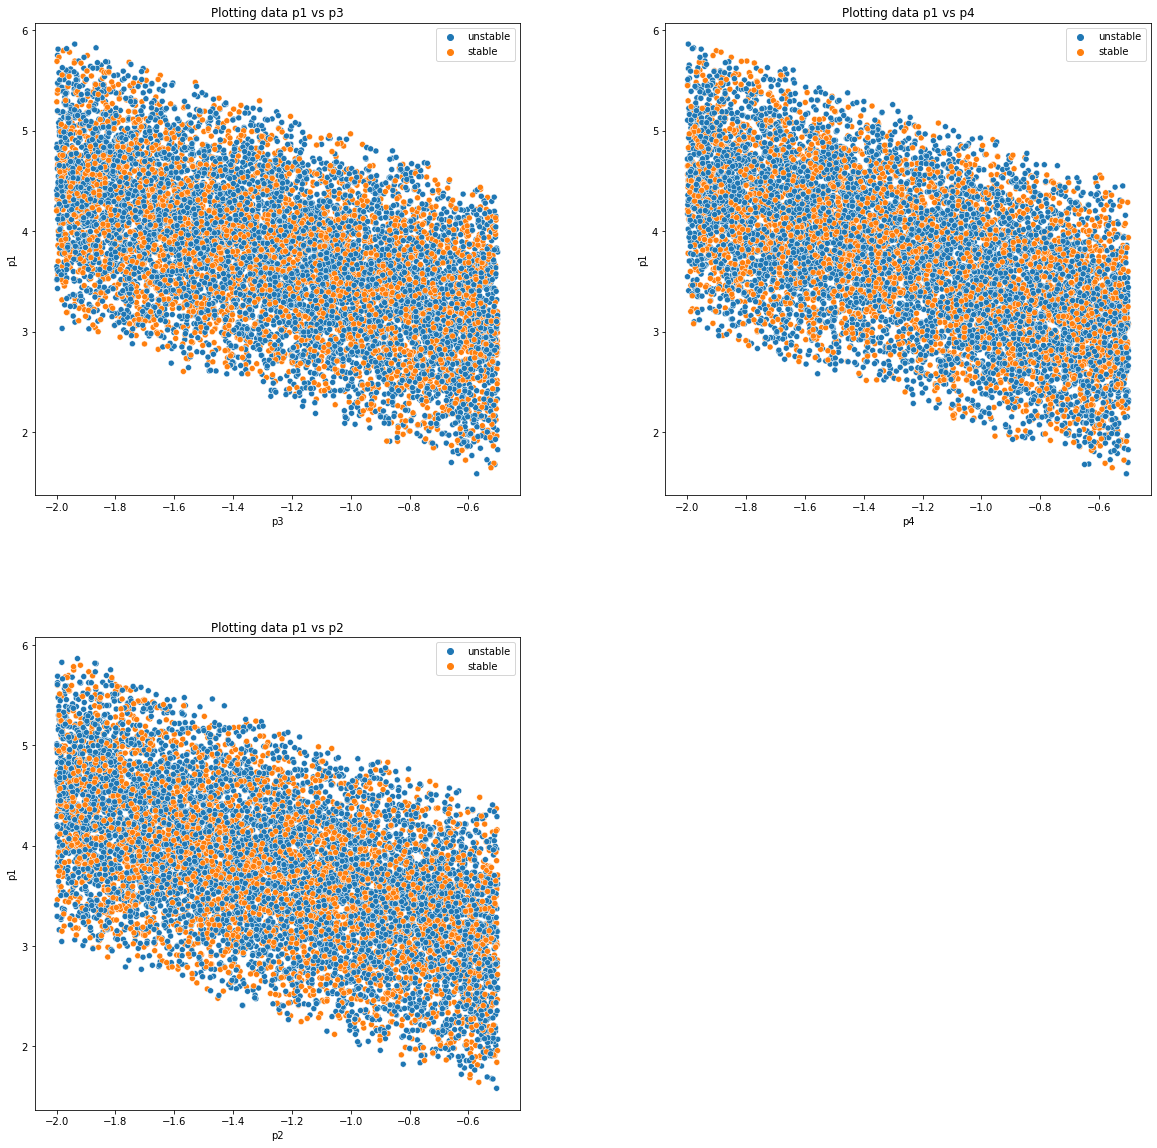

In [24]:
correlation_plot(data[['p2', 'p3', 'p4', 'p1', 'stabf']], vrs='p1')

* p1의 p2, p3, p4와의 상관관계가 큼
    * because p1 = abs(p2+p3+p4)이므로
* 분석할때 p1은 빼고 진행

## 3. 데이터 전처리

In [25]:
data['stabf'] = data['stabf'].astype('category')
data['stabf'].cat.categories = [0, 1] # 0 for stable, 1 for unstable
data['stabf'] = data['stabf'].astype('int')

In [26]:
data.tail()

tau1      tau2      tau3      tau4        p1        p2        p3  \
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab  stabf  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892      1  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803      0  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810      0  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789      1  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263      1

## 4. 데이터 분리

In [27]:
df = data.drop(columns=['p1', 'stab', 'stabf'])
# df = data.drop(columns=['p1','p2','p3','p4', 'stab', 'stabf'])

In [28]:
df

tau1      tau2      tau3      tau4        p2        p3        p4  \
0     2.959060  3.079885  8.381025  9.780754 -0.782604 -1.257395 -1.723086   
1     9.304097  4.902524  3.047541  1.369357 -1.940058 -1.872742 -1.255012   
2     8.971707  8.848428  3.046479  1.214518 -1.207456 -1.277210 -0.920492   
3     0.716415  7.669600  4.486641  2.340563 -1.027473 -1.938944 -0.997374   
4     3.134112  7.608772  4.943759  9.857573 -1.125531 -1.845975 -0.554305   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797 -0.658054 -1.449106 -1.236256   
9996  3.392299  1.274827  2.954947  6.894759 -1.663661 -0.952437 -1.733414   
9997  2.364034  2.842030  8.776391  1.008906 -1.380719 -0.943884 -1.975373   
9998  9.631511  3.994398  2.757071  7.821347 -0.966330 -0.649915 -0.898510   
9999  6.530527  6.781790  4.349695  8.673138 -1.390285 -1.532193 -0.570329   

            g1        g2        g3        g4  
0     0.650456  0.859578  0.887445  0.958034  
1     0.413441  0.862414  0.562139  0.781760  
2     0.163041  0.766689  0.839444  0.109853  
3     0.446209  0.976744  0.929381  0.362718  
4     0.797110  0.455450  0.656947  0.820923  
...        ...       ...       ...       ...  
9995  0.601709  0.779642  0.813512  0.608385  
9996  0.502079  0.567242  0.285880  0.366120  
9997  0.487838  0.986505  0.149286  0.145984  
9998  0.365246  0.587558  0.889118  0.818391  
9999  0.073056  0.505441  0.378761  0.942631  

[10000 rows x 11 columns]

In [29]:
target = data['stabf']
target

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: stabf, Length: 10000, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(df, target, stratify=target, test_size=0.2,
                                                 random_state=2)

In [31]:
np.shape(trainx), np.shape(testx)

((8000, 11), (2000, 11))

* test_size
    * 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.
* shuffle
    * default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.
* stratify
    * default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

* random_state
    * 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.


## 5. 모델링 및 학습

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

#### Train data

In [33]:
model.fit(trainx, trainy)
train_pred = model.predict(trainx)

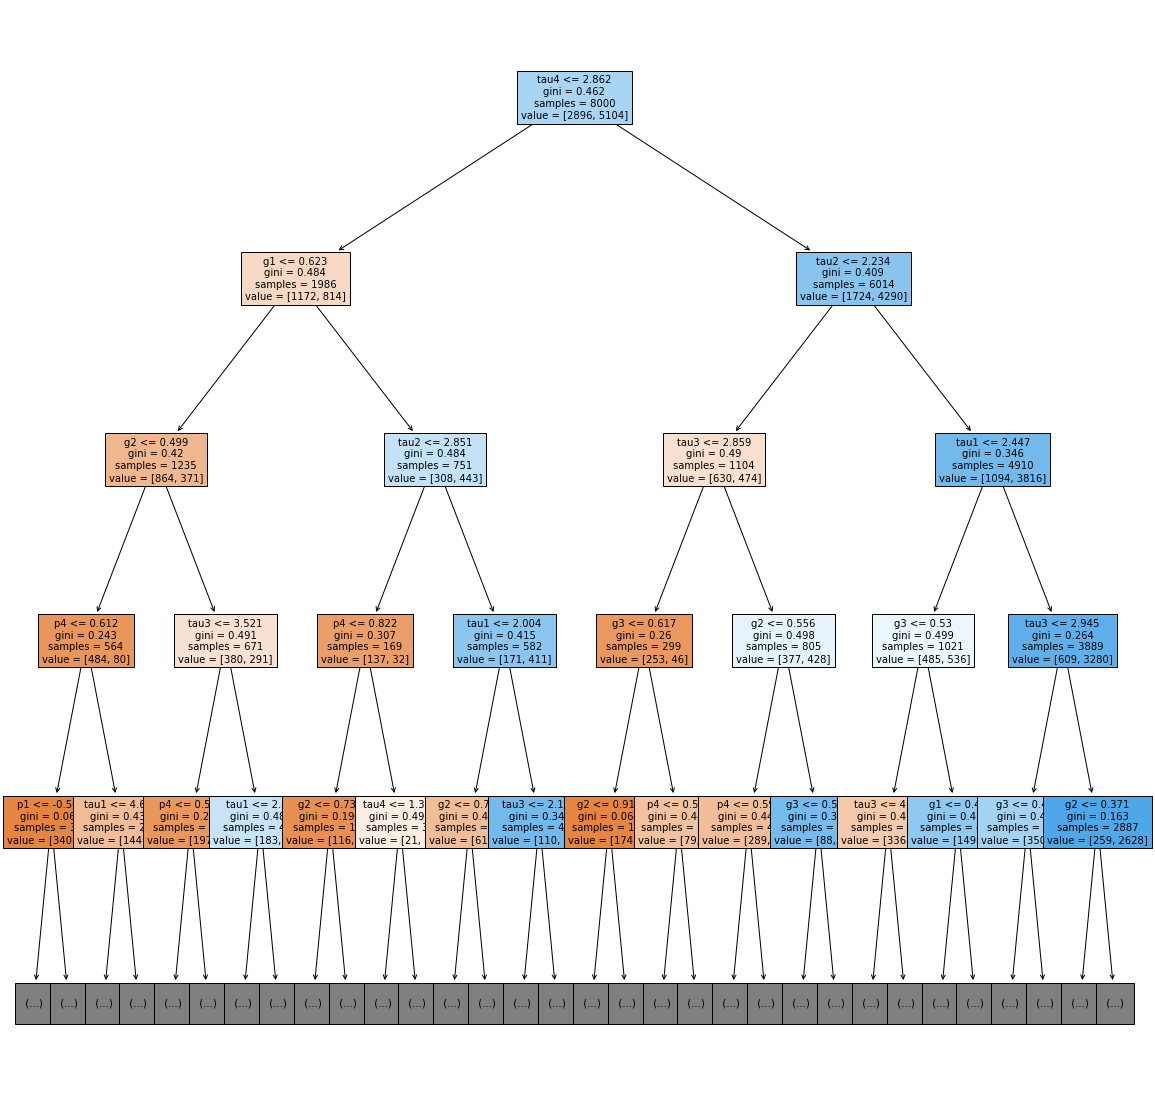

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=cols,
                 max_depth=4,
                 filled=True,
                 fontsize=10)

In [35]:
model.feature_importances_

array([0.12640092, 0.13653489, 0.12394717, 0.12478433, 0.01628193,
       0.02295136, 0.02264391, 0.11163107, 0.11628471, 0.105227  ,
       0.09331272])

In [36]:
cols.remove('p1')
#cols.remove('p2')
#cols.remove('p3')
#cols.remove('p4')
print(cols)

['tau1', 'tau2', 'tau3', 'tau4', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']


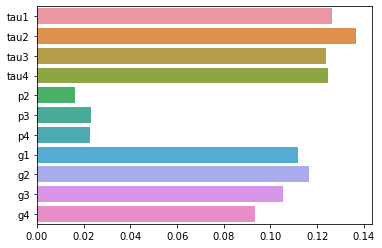

In [37]:
sns.barplot(x=model.feature_importances_, y = cols);

* 오버 피팅

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_true = trainy, y_pred = train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2896
           1       1.00      1.00      1.00      5104

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [39]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(trainy, train_pred)
print(matrix)

[[2896    0]
 [   0 5104]]


#### Test *data*

In [40]:
test_pred = model.predict(testx)

In [41]:
report = classification_report(y_true = testy, y_pred = test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       724
           1       0.87      0.88      0.88      1276

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000



In [42]:
matrix = confusion_matrix(testy, test_pred)
print(matrix)

[[ 557  167]
 [ 147 1129]]


In [43]:
#pip install import_ipynb

In [44]:
import import_ipynb
from res_vis import cmatrix

importing Jupyter notebook from res_vis.ipynb


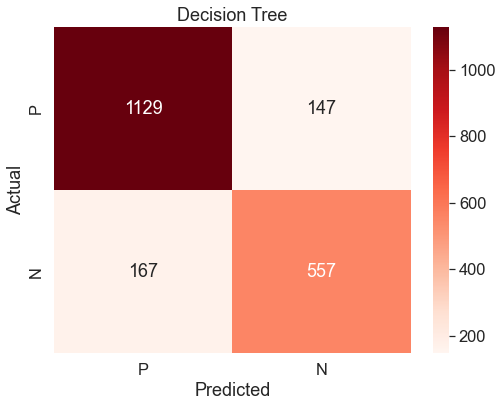

Accuracy: 	 0.84
Precision: 	 0.87
Recall: 	 0.88
Specificity: 	 0.77
F1_score: 	 0.88


In [45]:
cmatrix(np.array(testy), test_pred, 'Decision Tree')